<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:right;border-radius:5px 5px;">
    <i>Aprender una técnica no es un fin en si mismo, simplemente indica por donde hay que empezar</i><br><b>Proverbio Japonés</b></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:right;border-radius:5px 5px;">
<i>Material curado y organizado por el Prof. Dr. Hernán D. Merlino</i><br> 
<i>NLP Versión 1.0 - 2022 Q2</i></p> 

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>Auto NLP</strong></p>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

In [1]:
from platform import python_version

# En produccion sacar, solo se incluye a modo de informacion
print('Pyton version: {}'.format(python_version()))

Pyton version: 3.8.10


In [2]:
!jupyter --version

jupyter core     : 4.6.3
jupyter-notebook : 6.1.3
qtconsole        : 4.7.6
ipython          : 7.17.0
ipykernel        : 5.3.4
jupyter client   : 6.1.6
jupyter lab      : not installed
nbconvert        : 5.6.1
ipywidgets       : 7.5.1
nbformat         : 5.0.7
traitlets        : 4.3.3


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#!pip install pycaret

In [5]:
# En produccion sacar, solo se incluye a modo de informacion
import pycaret
print('Pycaret version:  %s' % pycaret.__version__)

from pycaret.nlp import *

Pycaret version:  2.3.10


In [6]:
from pycaret.datasets import get_data

In [7]:
import pandas as pd
import pprint
import warnings
warnings.filterwarnings("ignore")

In [8]:
#data = pd.read_csv("archive/comments.csv")
data = pd.read_csv("IMDB Dataset.csv", error_bad_lines=False)
data = data.sample(1000)

In [9]:
data.shape

(1000, 2)

In [10]:
stop_words = ["film", "movie" "films", "<br /><br />", "*"]

def applydelete(text):
    try:
        if (text):
            #text = clean(x, no_emoji=True)
            x = ' '.join([word for word in text.split() if word not in (stop_words)])
            return x
        else:
            return ""
    except:
        print(text)
        
data["review"] = data["review"].apply(applydelete)

In [11]:
data.head()

,review,sentiment
29865,in a college dorm a guy is killed by somebody ...,negative
35387,this agreeable french deals about a milliona...,positive
32928,sidney stratton is having trouble maintaining ...,positive
34833,"it starts slowly, showing the dreary lives of ...",positive
42218,when this plays on television you might want...,negative


In [12]:
data.shape

(1000, 2)

In [13]:
data = data.sample(1000, random_state=786).reset_index(drop=True)

In [14]:
#!pip install spacy

In [15]:
#!python -m spacy download en_core_web_sm

In [16]:
#!python3 -m spacy download en_core_web_sm

In [17]:
#!pip3 install -U spacy

In [18]:
import spacy

spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

In [19]:
%tb
from pycaret.nlp import *

nlp1=setup(data,target='review')

Description,Value
session_id,8250
Documents,1000
Vocab Size,10504
Custom Stopwords,False


In [20]:
#exp_nlp101 = setup(data = data, target = 'en', session_id = 123, verbose=True)

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Listado de modelos</strong></p>

In [21]:
models()

,Name,Reference
ID,,
lda,Latent Dirichlet Allocation,gensim/models/ldamodel
lsi,Latent Semantic Indexing,gensim/models/lsimodel
hdp,Hierarchical Dirichlet Process,gensim/models/hdpmodel
rp,Random Projections,gensim/models/rpmodel
nmf,Non-Negative Matrix Factorization,sklearn.decomposition.NMF


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Entrenar LDA con 4 tópicos</strong></p>

In [22]:
lda = create_model(model='lda', num_topics=3, verbose=True)

In [23]:
print(lda)

LdaModel(num_terms=10504, num_topics=3, decay=0.5, chunksize=100)


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Asignar resultado</strong></p>

In [24]:
lda_results = assign_model(lda)

In [25]:
lda_results.head()

,review,sentiment,Topic_0,Topic_1,Topic_2,Dominant_Topic,Perc_Dominant_Topic
0,tedious turgid boring mess example wrong conte...,negative,0.585061,0.408189,0.006750,Topic 0,0.59
1,yike see quite bad day company crow case well ...,negative,0.209290,0.788115,0.002595,Topic 1,0.79
2,look original horror flick may strange time li...,positive,0.669244,0.330037,0.000719,Topic 0,0.67
3,pretty transparent attempt wring cash thriving...,negative,0.278633,0.626605,0.094762,Topic 1,0.63
4,quite like flesh heat help feel grossly exploi...,negative,0.136429,0.861977,0.001594,Topic 1,0.86


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Optimizar el modelo (alternativo)</strong></p>

In [26]:
#tuned_lda = tune_model(model='lda', estimator='knn', optimize='Accuracy')

In [27]:
import matplotlib.pyplot as plt

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Visualización</strong></p>

In [28]:
plot_model(model=lda, plot='frequency')

In [29]:
plot_model(model=lda, plot = 'bigram')

In [30]:
plot_model(model=lda, plot = 'trigram')

In [31]:
plot_model(model=lda, plot = 'frequency', topic_num = 'Topic 0')

In [42]:
plot_model(model=lda, plot = 'frequency', topic_num = 'Topic 1')

In [32]:
plot_model(model=lda, plot = 'topic_distribution')

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Avantgarde';text-align:left;border-radius:5px;">
<strong>
<a href="https://datascientest.com/es/comprende-el-algoritmo-t-sne-en-3-pasos" target=\"_blank\">Algoritmo t-SNE</a>
</strong></p>

In [33]:
plot_model(model=lda, plot = 'tsne')

In [34]:
plot_model(model=lda, plot = 'sentiment')

In [35]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/eliana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/eliana/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
plot_model(model=lda, plot = 'pos')

In [37]:
plot_model(model=lda, plot='topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.041708  0.177726       1        1  68.832023
0      0.129514  0.015915       2        1  23.899940
2     -0.087806 -0.193641       3        1   7.268037, topic_info=           Term        Freq       Total Category  logprob  loglift
81    character  450.000000  450.000000  Default  30.0000  30.0000
113      horror   95.000000   95.000000  Default  29.0000  29.0000
531       story  461.000000  461.000000  Default  28.0000  28.0000
239         use  179.000000  179.000000  Default  27.0000  27.0000
306       young  128.000000  128.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
2072     arrive    8.822412   20.888477   Topic3  -6.5784   1.7598
975        role   11.044710  140.999673   Topic3  -6.3537   0.0749
499     perhaps    9.606388   55.565934   Topic3  -6.4932   0.8665
201     certain    8.483317   20.035509   Topic3  -6.6175   1.7623
506      rather    8.985840  102.764139   Topic3  -6.5600   0.1849

[235 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
343       1  0.463114   action
343       2  0.521003   action
343       3  0.019296   action
558       1  0.935122    actor
558       2  0.063588    actor
...     ...       ...      ...
196       2  0.211496    would
556       2  0.971755  writing
306       1  0.899565    young
306       2  0.007755    young
306       3  0.093058    young

[346 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

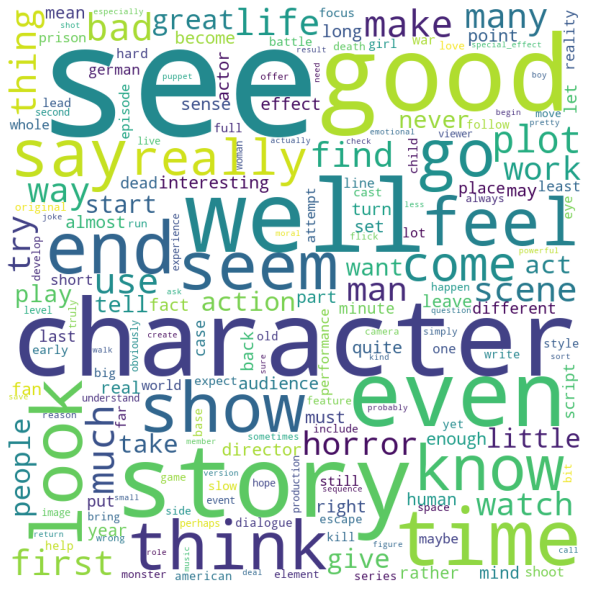

In [38]:
plot_model(model=lda, plot='wordcloud')

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Avantgarde';text-align:left;border-radius:5px;">
<strong>
<a href="https://umap-learn.readthedocs.io/en/latest/" target=\"_blank\">UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction</a>
</strong></p>

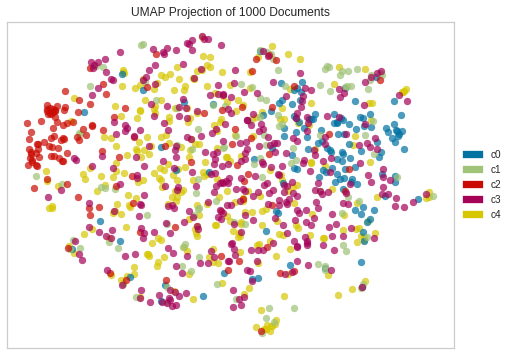

In [39]:
plot_model(model=lda, plot = 'umap')

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Avantgarde';text-align:left;border-radius:5px;">
<strong>
<a href="https://towardsdatascience.com/tsne-vs-umap-global-structure-4d8045acba17" target=\"_blank\">tSNE vs. UMAP: Global Structure</a>
</strong></p>

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Visualización Automática</strong></p>

In [40]:
evaluate_model(model=lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Salvar el modelo</strong></p>

In [41]:
save_model(lda, 'AutoNLP_PyCaret_KivaDataSet')

Model Succesfully Saved


(<gensim.models.ldamodel.LdaModel at 0x7f36b9a97850>,
 'AutoNLP_PyCaret_KivaDataSet.pkl')

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 